# Виконання

### Для початку імпортуємо модулі. Завантажимо датафрейм та виведемо його вміст.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/car_evaluation.csv')
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


*Сутності*

### Розділимо дані на тестові та навчальні.

In [33]:
x=df.drop(['class'],axis=1)
y=df['class']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train.shape,x_test.shape

((1209, 6), (519, 6))

*Тестові та навчальні дані*

### Перетворимо іменовані значення у числові.

In [34]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

/home/sideshowbobgot/.local/lib/python3.10/site-packages/category_encoders/utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
/home/sideshowbobgot/.local/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/home/sideshowbobgot/.local/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/home/sideshowbobgot/.local/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

*Перетворення іменованих значень у числові*

### Натренуємо модель.

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

*Тренування моделі*

### Спрогнозуємо значення

In [36]:
y_pred=rfc.predict(x_test)

*Прогнозування значень*

### Виведемо класифікаційний звіт.

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.70      0.77      0.73       111
        good       0.40      0.18      0.25        22
       unacc       0.94      0.97      0.96       368
       vgood       0.88      0.39      0.54        18

    accuracy                           0.87       519
   macro avg       0.73      0.58      0.62       519
weighted avg       0.87      0.87      0.86       519



*класифікайційний звіт*

### Побудуємо матрицю невідповідностей.

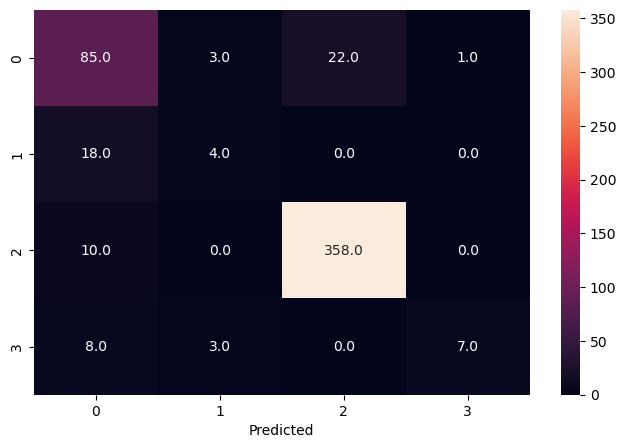

In [38]:
from sklearn.metrics import confusion_matrix
def conf_mat(model, x_test, y_test):
    y_predicted = model.predict(x_test)
    cm = confusion_matrix(y_test, y_predicted)
    plt.figure(figsize = (8,5))
    sns.heatmap(cm, annot=True, fmt=".1f")
    plt.xlabel('Predicted')
conf_mat(rfc, x_test, y_test)

*Матриця невідповідностей*

### Для побудови ROC застосуємо принцип "один проти всіх".

### Виведемо можливі значення класів.

In [39]:
target = y.unique()
target

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

*Значення класів*

### Бінаризуємо значення.

In [40]:
from sklearn.preprocessing import label_binarize
binarized = label_binarize(y, classes=[0, 1, 2])
binarized[:15]

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

*Бінаризація*

*Графік ROC*